DEEP LEARNING LAB 4

---

*Aditi Desai*

*200968126*

# Cats and Dogs

## Metadata:

Download dataset: (outside of keras)

In [114]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-08-23 19:22:51--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   124MB/s    in 0.5s    

2022-08-23 19:22:51 (124 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Extract the zip files for accessing the datasets

In [115]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

-The OS module in Python provides functions for interacting with the operating system. OS comes under Python’s standard utility modules. This module provides a portable way of using operating system-dependent functionality.

-To work on zip files using python, we will use an inbuilt python module called zipfile.

-zip file extracted to tmp directory in the files panel: tmp -> cats_and_dogs_filtered -> train/validation -> cats/dogs

Regularization and rescaling

In [116]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

Label the training and validation data for cats and dogs

In [117]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train') # obtain path to dir by joining path to base dir after '/'
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Now traverse through the training data to obtains the number of classes from labelled data

In [118]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


Now traverse through the validation data to obtains the number of classes from labelled data

In [119]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [120]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

In [121]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
print(train_dog_fnames[:10])

['cat.15.jpg', 'cat.277.jpg', 'cat.617.jpg', 'cat.165.jpg', 'cat.662.jpg', 'cat.696.jpg', 'cat.885.jpg', 'cat.365.jpg', 'cat.818.jpg', 'cat.504.jpg']
['dog.801.jpg', 'dog.155.jpg', 'dog.21.jpg', 'dog.130.jpg', 'dog.875.jpg', 'dog.625.jpg', 'dog.180.jpg', 'dog.677.jpg', 'dog.842.jpg', 'dog.418.jpg']


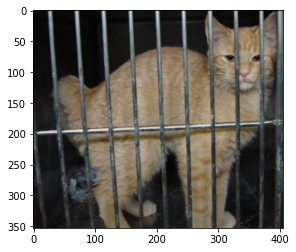

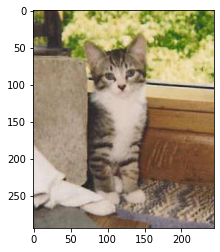

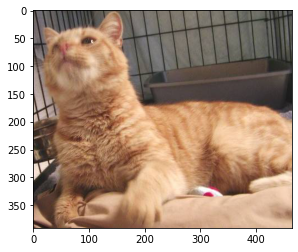

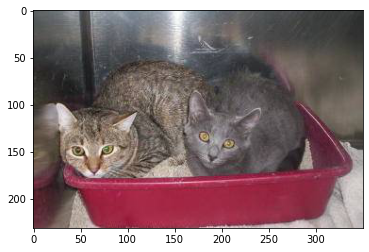

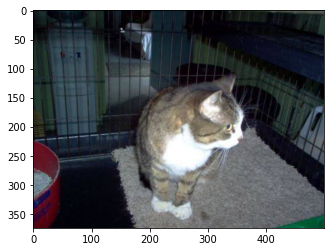

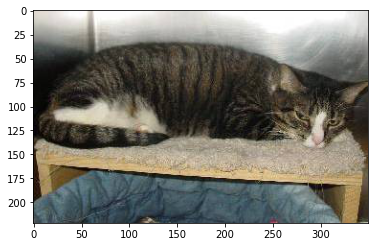

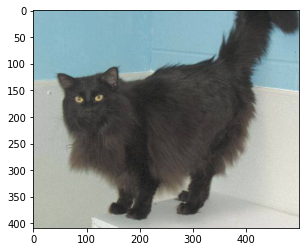

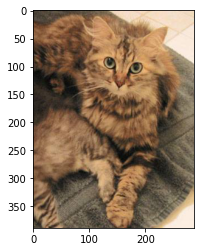

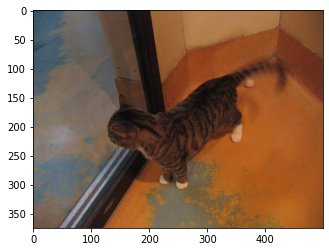

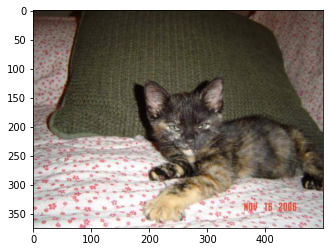

In [9]:
for i in range (10) :
  plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[i]))) 
  plt.show()

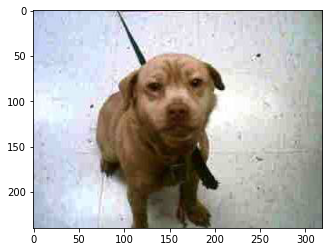

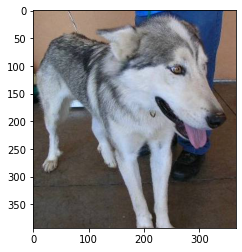

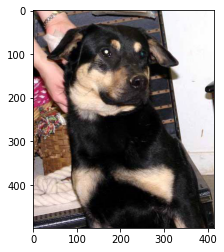

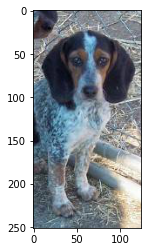

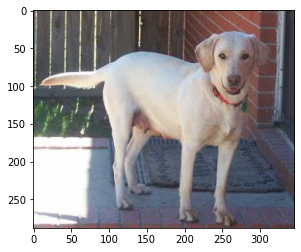

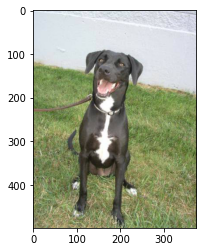

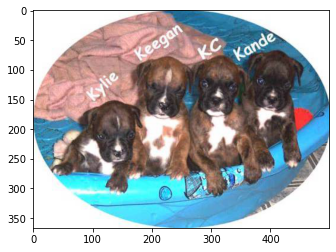

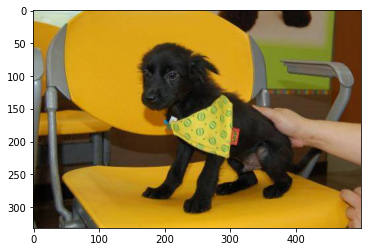

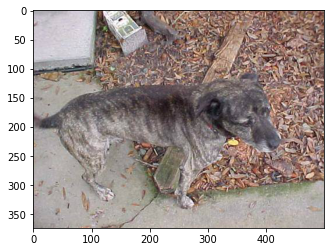

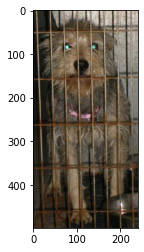

In [10]:
for i in range (10) :
  plt.imshow(mpimg.imread(os.path.join(train_dogs_dir, train_dog_fnames[i]))) 
  plt.show()

# Horse and zebra

## Metadata:

Horse2zebra dataset consists of 1187 Horse & 1474 Zebra Images. Images in both the domains are split into train and test subsets.

In [11]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

%matplotlib inline

In [12]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
import os
import zipfile
from PIL import Image

In [14]:
# importing the data
if not os.path.exists('./horse2zebra'):
  import gdown
  url = 'https://drive.google.com/uc?id=1jPelB2jzNZJq3ZU9Uk_Mkt4MJtF3DRgg'
  gdown.download(url, './horse2zebra.zip', quiet=False)
  !unzip ./horse2zebra.zip > /dev/null

Downloading...
From: https://drive.google.com/uc?id=1jPelB2jzNZJq3ZU9Uk_Mkt4MJtF3DRgg
To: /content/horse2zebra.zip
100%|██████████| 117M/117M [00:00<00:00, 198MB/s] 


In [15]:
# extracting the training images
for root, dirs, files in os.walk('./horse2zebra'):
    if root.endswith('/train/A'):
        filenames_horses=files
    if root.endswith('/train/B'):
        filenames_zebras=files

# sorting the filenames
filenames_horses_sort=sorted(filenames_horses)
filenames_zebras_sort=sorted(filenames_zebras)

horses_root='./horse2zebra/train/A'
zebras_root='./horse2zebra/train/B'

horses_train=[]
zebras_train=[]

# saving all the images in the appropriate directories
for i in range(len(filenames_horses_sort)):
          horses_train.append(Image.open(os.path.join(horses_root, filenames_horses_sort[i])).convert('RGB'))

for i in range(len(filenames_zebras_sort)):
          zebras_train.append(Image.open(os.path.join(zebras_root, filenames_zebras_sort[i])).convert('RGB'))

train_dir = './horse2zebra/train'

In [16]:
#Extracting the testing images
for root, dirs, files in os.walk('./horse2zebra'):
    if root.endswith('/test/A'):
        filenames_horses=files
    if root.endswith('/test/B'):
        filenames_zebras=files

#Sorting the filenames
filenames_horses_sort=sorted(filenames_horses)
filenames_zebras_sort=sorted(filenames_zebras)

horses_root='./horse2zebra/test/A'
zebras_root='./horse2zebra/test/B'

horses_test=[]
zebras_test=[]

#Saving all the images in the appropriate directories
for i in range(len(filenames_horses_sort)):
          horses_test.append(Image.open(os.path.join(horses_root, filenames_horses_sort[i])).convert('RGB'))

for i in range(len(filenames_zebras_sort)):
          zebras_test.append(Image.open(os.path.join(zebras_root, filenames_zebras_sort[i])).convert('RGB'))

test_dir = './horse2zebra/test'

In [17]:
# All images will be rescaled by 1./255
train_dg = ImageDataGenerator(rescale=1./255)
test_dg = ImageDataGenerator(rescale=1./255)

In [44]:
# Flow training images in batches of 20 using train_dg generator
train_gtr = train_dg.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2401 images belonging to 2 classes.


In [45]:
# Flow test images in batches of 20 using test_dg generator
test_gtr = test_dg.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 260 images belonging to 2 classes.


**Q1. Implement the AlexNet architecture. Train, test and report the performance of this model on theCats_and_Dogs_Dataset, Horse2Zebra Dataset**

# AlexNet

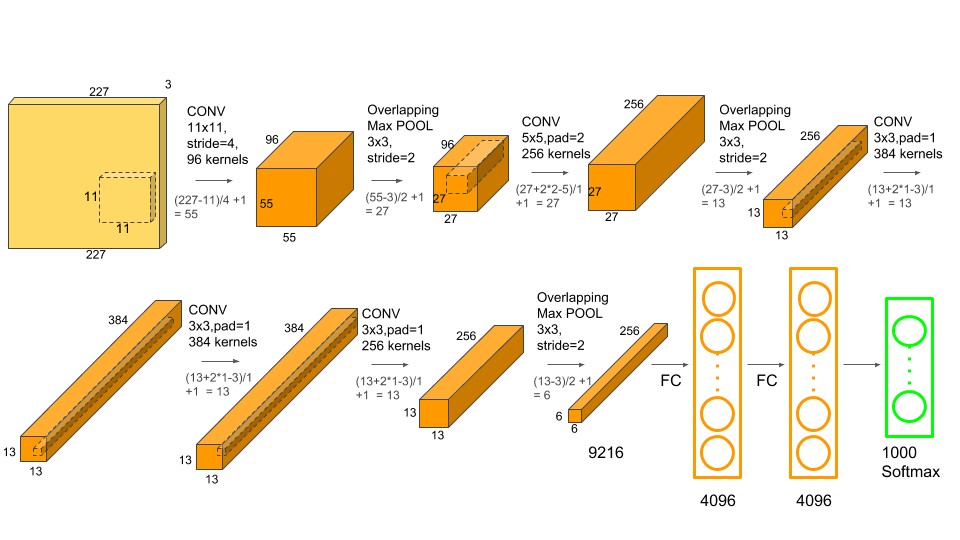

In [20]:
import tensorflow as tf
import keras
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
model1 = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_193 (Conv2D)         (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization_193 (Ba  (None, 54, 54, 96)       384       
 tchNormalization)                                               
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 26, 26, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_194 (Conv2D)         (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_194 (Ba  (None, 26, 26, 256)      1024      
 tchNormalization)                                               
                                                      

In [123]:
model1.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

## Cats and Dogs Model building:

In [130]:
history = model1.fit(train_generator, epochs=10, batch_size=20, validation_data=validation_generator, verbose=1)

Epoch 1/10
100/100 [==============================] - 10s 104ms/step - loss: 0.8720 - acc: 0.5910 - val_loss: 0.6465 - val_acc: 0.6290
Epoch 2/10
100/100 [==============================] - 10s 102ms/step - loss: 0.6365 - acc: 0.6895 - val_loss: 0.7667 - val_acc: 0.5710
Epoch 3/10
100/100 [==============================] - 10s 103ms/step - loss: 0.5330 - acc: 0.7380 - val_loss: 0.5994 - val_acc: 0.6750
Epoch 4/10
100/100 [==============================] - 10s 103ms/step - loss: 0.4630 - acc: 0.7940 - val_loss: 0.6508 - val_acc: 0.6490
Epoch 5/10
100/100 [==============================] - 10s 102ms/step - loss: 0.4308 - acc: 0.7950 - val_loss: 0.5682 - val_acc: 0.7200
Epoch 6/10
100/100 [==============================] - 10s 103ms/step - loss: 0.3683 - acc: 0.8325 - val_loss: 0.5898 - val_acc: 0.7020
Epoch 7/10
100/100 [==============================] - 10s 103ms/step - loss: 0.3418 - acc: 0.8570 - val_loss: 0.5921 - val_acc: 0.7030
Epoch 8/10
100/100 [==============================] - 1

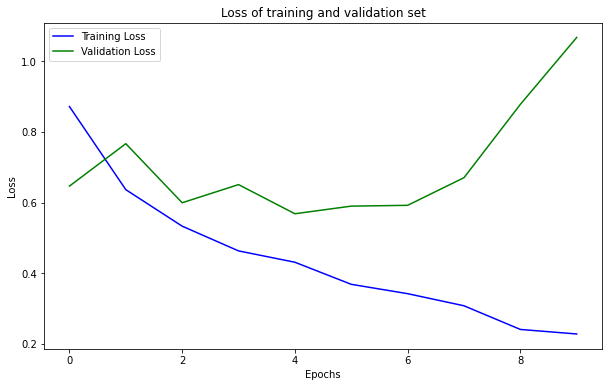

In [131]:
#Visualize the training and validation Loss
plt.figure(figsize = (10,6))
plt.plot(history.history['loss'], color = 'blue', label = 'Training Loss')
plt.plot(history.history['val_loss'], color = 'green', label = 'Validation Loss')
plt.legend()
plt.title('Loss of training and validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

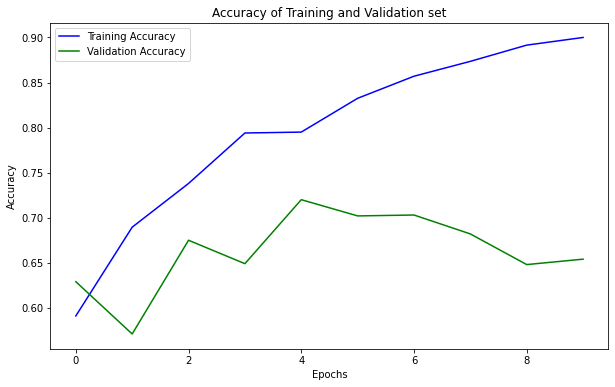

In [132]:
#Visualize the training and validation Accuracy
plt.figure(figsize = (10,6))
plt.plot(history.history['acc'], color = 'blue', label = 'Training Accuracy')
plt.plot(history.history['val_acc'], color = 'green', label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy of Training and Validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [133]:
#Evaluate model
model1.evaluate(validation_generator)

50/50 [==============================] - 3s 67ms/step - loss: 1.0677 - acc: 0.6540


[1.0676584243774414, 0.6539999842643738]

## Horse and Zebra Model building:

In [135]:
history = model1.fit(
train_gtr,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 9s 91ms/step - loss: 0.3713 - acc: 0.8652 - val_loss: 1.3675 - val_acc: 0.5040
Epoch 2/10
100/100 [==============================] - 9s 90ms/step - loss: 0.1638 - acc: 0.9288 - val_loss: 1.2224 - val_acc: 0.5120
Epoch 3/10
100/100 [==============================] - 9s 92ms/step - loss: 0.1437 - acc: 0.9414 - val_loss: 1.4357 - val_acc: 0.4780
Epoch 4/10
100/100 [==============================] - 10s 98ms/step - loss: 0.1071 - acc: 0.9581 - val_loss: 1.8415 - val_acc: 0.4740
Epoch 5/10
100/100 [==============================] - 9s 91ms/step - loss: 0.1266 - acc: 0.9490 - val_loss: 1.7884 - val_acc: 0.4710
Epoch 6/10
100/100 [==============================] - 9s 92ms/step - loss: 0.0667 - acc: 0.9743 - val_loss: 2.4411 - val_acc: 0.4710
Epoch 7/10
100/100 [==============================] - 11s 105ms/step - loss: 0.1127 - acc: 0.9596 - val_loss: 1.8710 - val_acc: 0.4830
Epoch 8/10
100/100 [==============================] - 9s 91ms/step

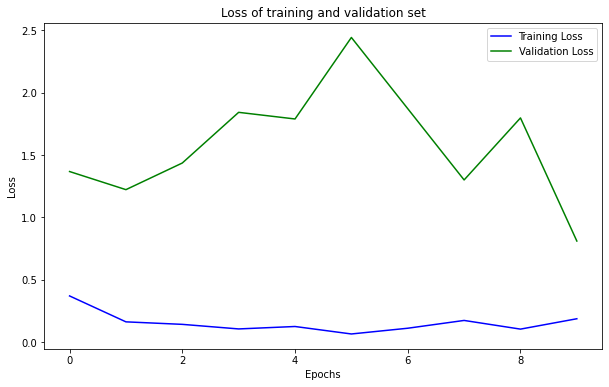

In [136]:
#Visualize the training and validation Loss
plt.figure(figsize = (10,6))
plt.plot(history.history['loss'], color = 'blue', label = 'Training Loss')
plt.plot(history.history['val_loss'], color = 'green', label = 'Validation Loss')
plt.legend()
plt.title('Loss of training and validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

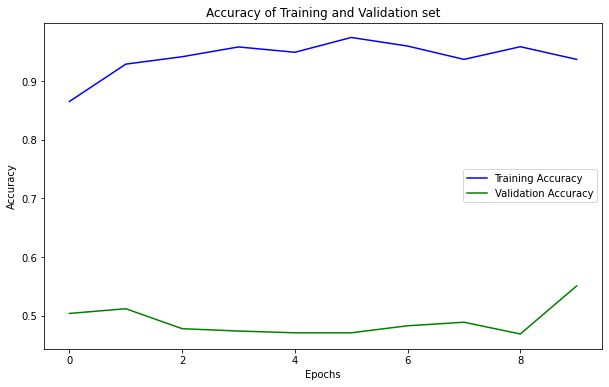

In [137]:
#Visualize the training and validation Accuracy
plt.figure(figsize = (10,6))
plt.plot(history.history['acc'], color = 'blue', label = 'Training Accuracy')
plt.plot(history.history['val_acc'], color = 'green', label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy of Training and Validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [138]:
#Evaluate model
model1.evaluate(test_gtr)

13/13 [==============================] - 1s 53ms/step - loss: 0.4580 - acc: 0.7692


[0.45802149176597595, 0.7692307829856873]

**Q2.  Train, test and report the performances using the following models on the Cats_and_Dogs_Datasetand Horse2Zebra dataset.**

1) VGG-16

2) GoogleNet

3) ResNet50

4)EfficientNetB0

5) MobileNetV2

# VGG-16

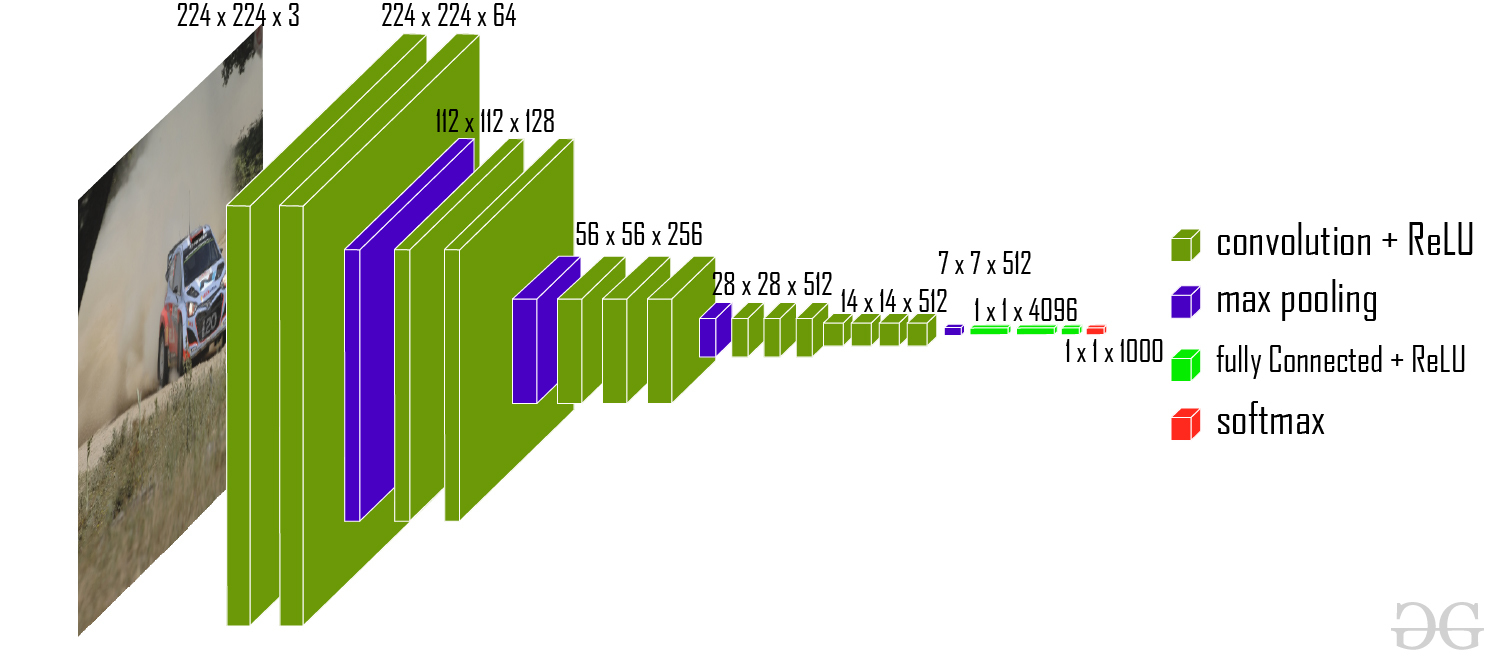

In [27]:
from keras.applications.vgg16 import VGG16
base_model2 = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model2.trainable = False #freeze the layers
base_model2.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [28]:
import tensorflow as tf
model2 = tf.keras.Sequential([
    base_model2,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model2.summary()

model2.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


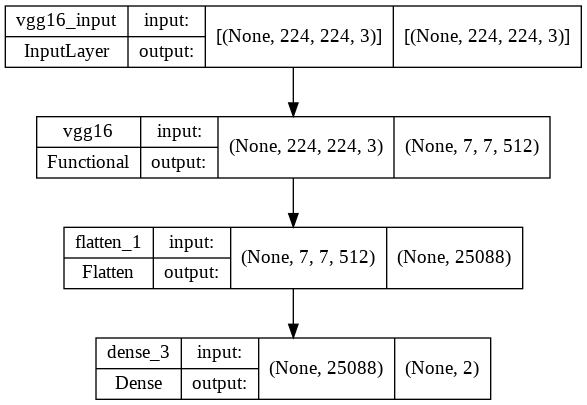

In [29]:
from tensorflow.keras.utils import plot_model
plot_model(model2,  show_shapes=True, show_layer_names=True)

Train the model:

## cats and dogs

In [126]:
history = model2.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 19s 188ms/step - loss: 0.2762 - acc: 0.8815 - val_loss: 0.2875 - val_acc: 0.8820
Epoch 2/10
100/100 [==============================] - 17s 175ms/step - loss: 0.1069 - acc: 0.9715 - val_loss: 0.2871 - val_acc: 0.8890
Epoch 3/10
100/100 [==============================] - 18s 179ms/step - loss: 0.0861 - acc: 0.9840 - val_loss: 0.2514 - val_acc: 0.8900
Epoch 4/10
100/100 [==============================] - 18s 179ms/step - loss: 0.0707 - acc: 0.9900 - val_loss: 0.2470 - val_acc: 0.9010
Epoch 5/10
100/100 [==============================] - 18s 181ms/step - loss: 0.0635 - acc: 0.9930 - val_loss: 0.2398 - val_acc: 0.8980
Epoch 6/10
100/100 [==============================] - 18s 182ms/step - loss: 0.0550 - acc: 0.9955 - val_loss: 0.2368 - val_acc: 0.9070
Epoch 7/10
100/100 [==============================] - 18s 183ms/step - loss: 0.0500 - acc: 0.9960 - val_loss: 0.2353 - val_acc: 0.8930
Epoch 8/10
100/100 [==============================] - 1

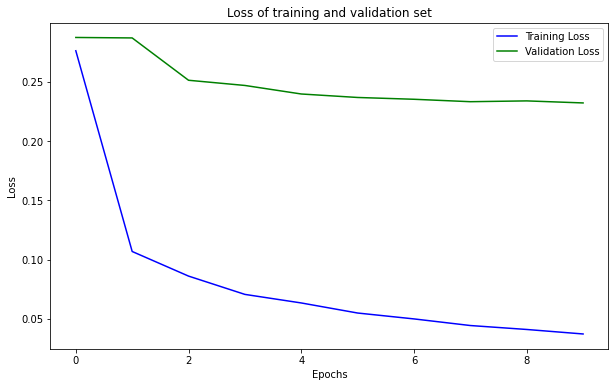

In [127]:
#Visualize the training and validation Loss
plt.figure(figsize = (10,6))
plt.plot(history.history['loss'], color = 'blue', label = 'Training Loss')
plt.plot(history.history['val_loss'], color = 'green', label = 'Validation Loss')
plt.legend()
plt.title('Loss of training and validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

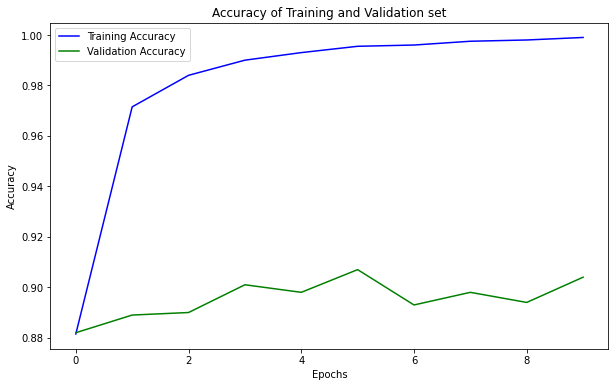

In [128]:
#Visualize the training and validation Accuracy
plt.figure(figsize = (10,6))
plt.plot(history.history['acc'], color = 'blue', label = 'Training Accuracy')
plt.plot(history.history['val_acc'], color = 'green', label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy of Training and Validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [129]:
#Evaluate model
model2.evaluate(validation_generator)

50/50 [==============================] - 6s 119ms/step - loss: 0.2322 - acc: 0.9040


[0.23223629593849182, 0.9039999842643738]

## horse and zebra

In [36]:
history = model2.fit(
train_gtr,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 19s 187ms/step - loss: 0.4586 - acc: 0.8072 - val_loss: 0.5865 - val_acc: 0.7430
Epoch 2/10
100/100 [==============================] - 19s 187ms/step - loss: 0.1547 - acc: 0.9435 - val_loss: 0.7513 - val_acc: 0.6980
Epoch 3/10
100/100 [==============================] - 18s 184ms/step - loss: 0.1202 - acc: 0.9561 - val_loss: 0.6729 - val_acc: 0.7220
Epoch 4/10
100/100 [==============================] - 19s 186ms/step - loss: 0.0995 - acc: 0.9682 - val_loss: 0.9654 - val_acc: 0.6690
Epoch 5/10
100/100 [==============================] - 19s 193ms/step - loss: 0.0837 - acc: 0.9788 - val_loss: 0.8708 - val_acc: 0.6850
Epoch 6/10
100/100 [==============================] - 19s 190ms/step - loss: 0.0780 - acc: 0.9805 - val_loss: 1.0508 - val_acc: 0.6550
Epoch 7/10
100/100 [==============================] - 19s 188ms/step - loss: 0.0718 - acc: 0.9803 - val_loss: 0.8916 - val_acc: 0.6850
Epoch 8/10
100/100 [==============================] - 1

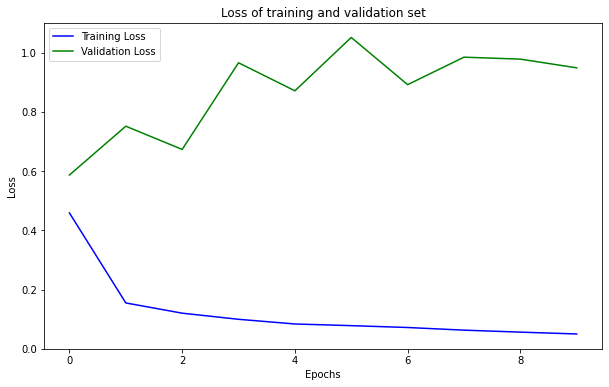

In [37]:
#Visualize the training and validation Loss
plt.figure(figsize = (10,6))
plt.plot(history.history['loss'], color = 'blue', label = 'Training Loss')
plt.plot(history.history['val_loss'], color = 'green', label = 'Validation Loss')
plt.legend()
plt.title('Loss of training and validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

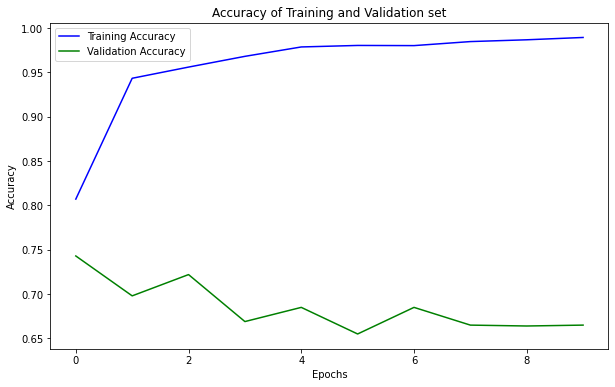

In [38]:
#Visualize the training and validation Accuracy
plt.figure(figsize = (10,6))
plt.plot(history.history['acc'], color = 'blue', label = 'Training Accuracy')
plt.plot(history.history['val_acc'], color = 'green', label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy of Training and Validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [39]:
#Evaluate model
model2.evaluate(test_gtr)

13/13 [==============================] - 2s 122ms/step - loss: 0.0985 - acc: 0.9731


[0.09849367290735245, 0.9730769395828247]

# GoogleNet

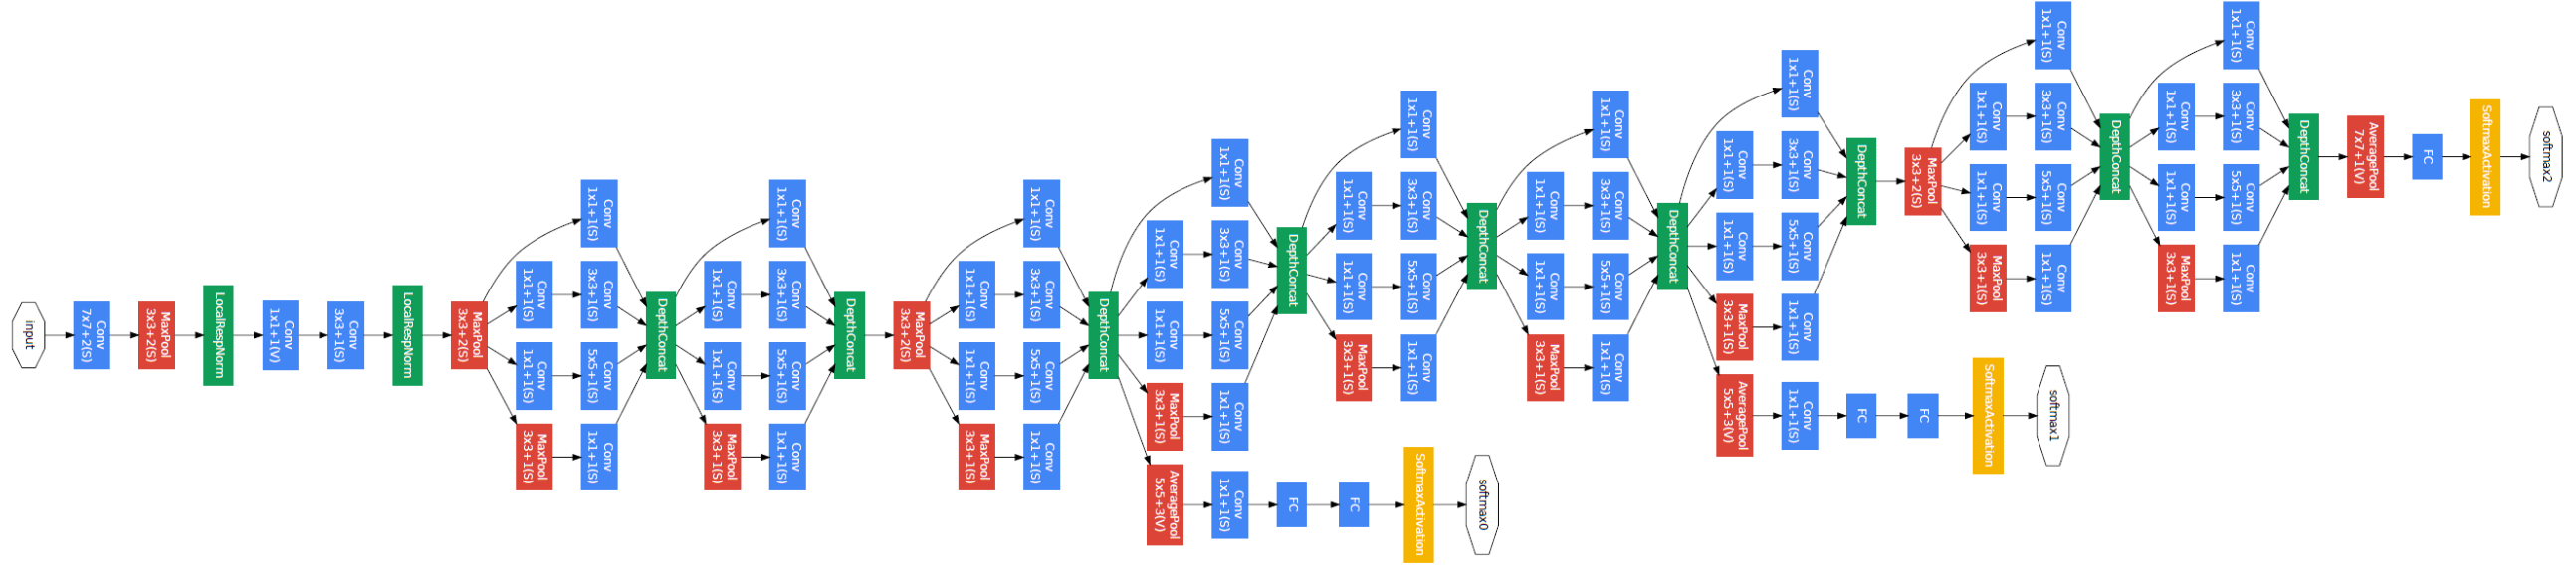

In [58]:
from tensorflow.keras.applications import InceptionV3
base_model3 = InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model3.trainable = False #freeze the layers
base_model3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_99 (Conv2D)             (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_99 (BatchN  (None, 111, 111, 32  96         ['conv2d_99[0][0]']              
 ormalization)                  )                                                      

In [60]:
import tensorflow as tf
model3 = tf.keras.Sequential([
    base_model3,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model3.summary()

model3.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 51200)             0         
                                                                 
 dense_6 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


## cats and dogs

In [68]:
history = model3.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 10s 102ms/step - loss: 1.4542e-04 - acc: 1.0000 - val_loss: 3.7439 - val_acc: 0.3300
Epoch 2/10
100/100 [==============================] - 11s 108ms/step - loss: 1.3225e-04 - acc: 1.0000 - val_loss: 3.7535 - val_acc: 0.3250
Epoch 3/10
100/100 [==============================] - 10s 101ms/step - loss: 1.1708e-04 - acc: 1.0000 - val_loss: 3.7178 - val_acc: 0.3190
Epoch 4/10
100/100 [==============================] - 12s 116ms/step - loss: 1.0171e-04 - acc: 1.0000 - val_loss: 3.8873 - val_acc: 0.3420
Epoch 5/10
100/100 [==============================] - 10s 99ms/step - loss: 1.0757e-04 - acc: 1.0000 - val_loss: 3.8508 - val_acc: 0.3350
Epoch 6/10
100/100 [==============================] - 10s 100ms/step - loss: 8.1380e-05 - acc: 1.0000 - val_loss: 3.9250 - val_acc: 0.3410
Epoch 7/10
100/100 [==============================] - 10s 100ms/step - loss: 7.4467e-05 - acc: 1.0000 - val_loss: 3.9256 - val_acc: 0.3380
Epoch 8/10
100/100 [========

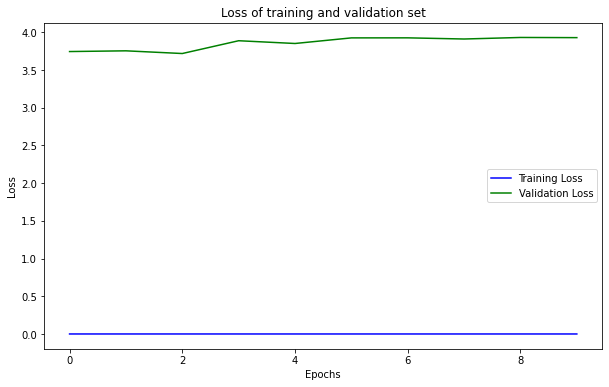

In [69]:
#Visualize the training and validation Loss
plt.figure(figsize = (10,6))
plt.plot(history.history['loss'], color = 'blue', label = 'Training Loss')
plt.plot(history.history['val_loss'], color = 'green', label = 'Validation Loss')
plt.legend()
plt.title('Loss of training and validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

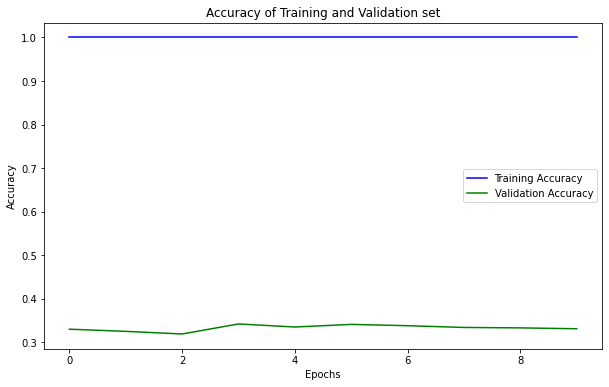

In [71]:
#Visualize the training and validation Accuracy
plt.figure(figsize = (10,6))
plt.plot(history.history['acc'], color = 'blue', label = 'Training Accuracy')
plt.plot(history.history['val_acc'], color = 'green', label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy of Training and Validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [70]:
#Evaluate model
model3.evaluate(validation_generator)

50/50 [==============================] - 4s 77ms/step - loss: 3.9283 - acc: 0.3310


[3.9283287525177, 0.3310000002384186]

## horse and zebra

In [63]:
history = model3.fit(
train_gtr,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 16s 112ms/step - loss: 0.0660 - acc: 0.9710 - val_loss: 3.2193 - val_acc: 0.4130
Epoch 2/10
100/100 [==============================] - 11s 114ms/step - loss: 0.0084 - acc: 0.9980 - val_loss: 2.7753 - val_acc: 0.2680
Epoch 3/10
100/100 [==============================] - 10s 102ms/step - loss: 0.0102 - acc: 0.9960 - val_loss: 3.3308 - val_acc: 0.3220
Epoch 4/10
100/100 [==============================] - 10s 101ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 3.2680 - val_acc: 0.3060
Epoch 5/10
100/100 [==============================] - 10s 101ms/step - loss: 0.0044 - acc: 0.9985 - val_loss: 2.9064 - val_acc: 0.2770
Epoch 6/10
100/100 [==============================] - 10s 103ms/step - loss: 0.0041 - acc: 0.9985 - val_loss: 3.1270 - val_acc: 0.2750
Epoch 7/10
100/100 [==============================] - 10s 101ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 3.4881 - val_acc: 0.3130
Epoch 8/10
100/100 [==============================] - 1

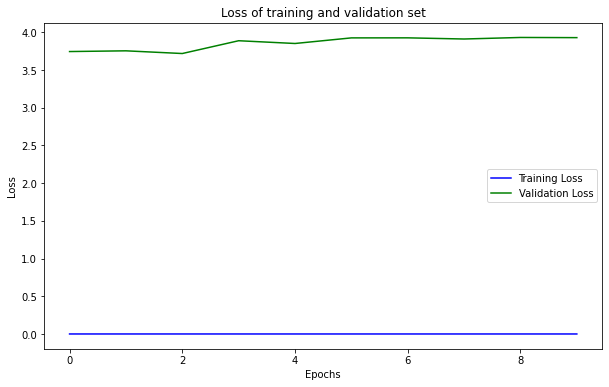

In [72]:
#Visualize the training and validation Loss
plt.figure(figsize = (10,6))
plt.plot(history.history['loss'], color = 'blue', label = 'Training Loss')
plt.plot(history.history['val_loss'], color = 'green', label = 'Validation Loss')
plt.legend()
plt.title('Loss of training and validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

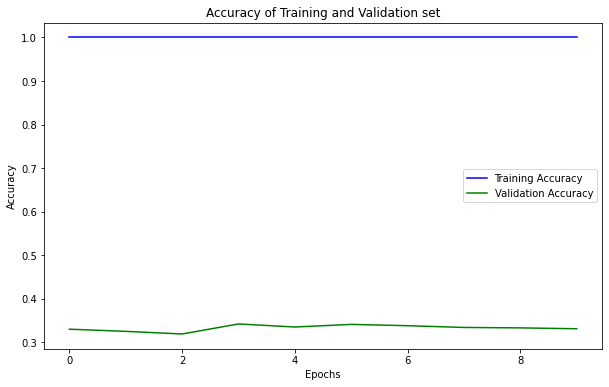

In [73]:
#Visualize the training and validation Accuracy
plt.figure(figsize = (10,6))
plt.plot(history.history['acc'], color = 'blue', label = 'Training Accuracy')
plt.plot(history.history['val_acc'], color = 'green', label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy of Training and Validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [74]:
#Evaluate model
model3.evaluate(test_gtr)

13/13 [==============================] - 1s 66ms/step - loss: 0.0748 - acc: 0.9846


[0.07480734586715698, 0.9846153855323792]

# ResNet50

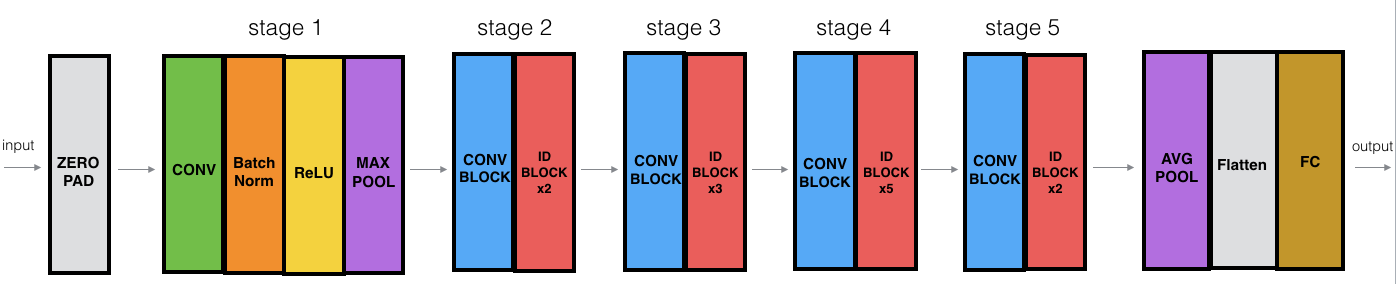

In [75]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [76]:
base_model4 = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model4.trainable = False #freeze the layers
base_model4.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [77]:
import tensorflow as tf
model4 = tf.keras.Sequential([
    base_model4,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model4.summary()

model4.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_5 (Flatten)         (None, 100352)            0         
                                                                 
 dense_7 (Dense)             (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


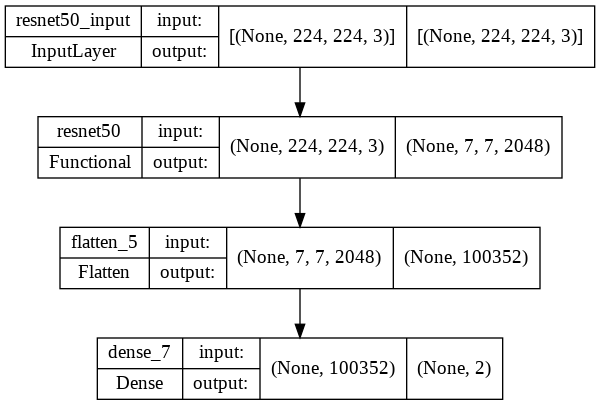

In [78]:
from tensorflow.keras.utils import plot_model
plot_model(model4,  show_shapes=True, show_layer_names=True)

## cats and dogs

In [79]:
history = model4.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 16s 126ms/step - loss: 0.5545 - acc: 0.7118 - val_loss: 0.8860 - val_acc: 0.5260
Epoch 2/10
100/100 [==============================] - 11s 114ms/step - loss: 0.4396 - acc: 0.7880 - val_loss: 0.9763 - val_acc: 0.5160
Epoch 3/10
100/100 [==============================] - 12s 115ms/step - loss: 0.3847 - acc: 0.8314 - val_loss: 0.9053 - val_acc: 0.5170
Epoch 4/10
100/100 [==============================] - 12s 116ms/step - loss: 0.3770 - acc: 0.8248 - val_loss: 0.7719 - val_acc: 0.5330
Epoch 5/10
100/100 [==============================] - 12s 116ms/step - loss: 0.3350 - acc: 0.8571 - val_loss: 0.9102 - val_acc: 0.5130
Epoch 6/10
100/100 [==============================] - 12s 116ms/step - loss: 0.3279 - acc: 0.8617 - val_loss: 1.6582 - val_acc: 0.5090
Epoch 7/10
100/100 [==============================] - 12s 116ms/step - loss: 0.3209 - acc: 0.8622 - val_loss: 1.1779 - val_acc: 0.5110
Epoch 8/10
100/100 [==============================] - 1

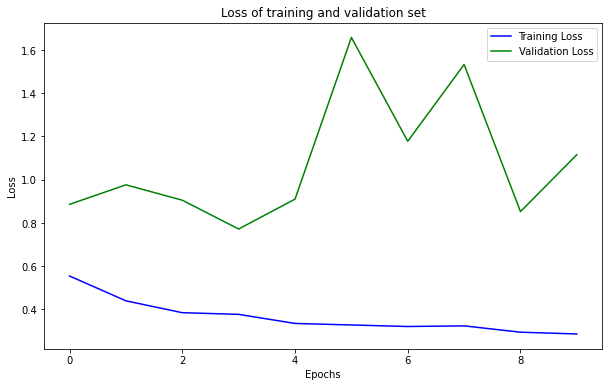

In [81]:
#Visualize the training and validation Loss
plt.figure(figsize = (10,6))
plt.plot(history.history['loss'], color = 'blue', label = 'Training Loss')
plt.plot(history.history['val_loss'], color = 'green', label = 'Validation Loss')
plt.legend()
plt.title('Loss of training and validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

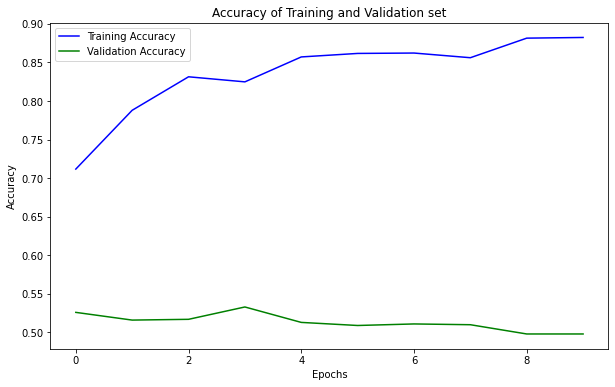

In [82]:
#Visualize the training and validation Accuracy
plt.figure(figsize = (10,6))
plt.plot(history.history['acc'], color = 'blue', label = 'Training Accuracy')
plt.plot(history.history['val_acc'], color = 'green', label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy of Training and Validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [83]:
#Evaluate model
model4.evaluate(validation_generator)

50/50 [==============================] - 4s 84ms/step - loss: 1.1158 - acc: 0.4980


[1.1157699823379517, 0.49799999594688416]

## horse and zebra

In [84]:
history = model4.fit(
train_gtr,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 13s 126ms/step - loss: 0.2921 - acc: 0.8889 - val_loss: 1.5399 - val_acc: 0.5040
Epoch 2/10
100/100 [==============================] - 12s 115ms/step - loss: 0.2765 - acc: 0.8839 - val_loss: 1.0506 - val_acc: 0.4880
Epoch 3/10
100/100 [==============================] - 11s 115ms/step - loss: 0.2758 - acc: 0.8864 - val_loss: 1.3083 - val_acc: 0.5030
Epoch 4/10
100/100 [==============================] - 12s 116ms/step - loss: 0.2593 - acc: 0.8965 - val_loss: 1.1288 - val_acc: 0.4980
Epoch 5/10
100/100 [==============================] - 12s 116ms/step - loss: 0.2603 - acc: 0.8935 - val_loss: 1.0382 - val_acc: 0.5000
Epoch 6/10
100/100 [==============================] - 12s 117ms/step - loss: 0.2749 - acc: 0.8849 - val_loss: 0.9725 - val_acc: 0.4900
Epoch 7/10
100/100 [==============================] - 12s 116ms/step - loss: 0.3003 - acc: 0.8675 - val_loss: 1.1961 - val_acc: 0.4970
Epoch 8/10
100/100 [==============================] - 1

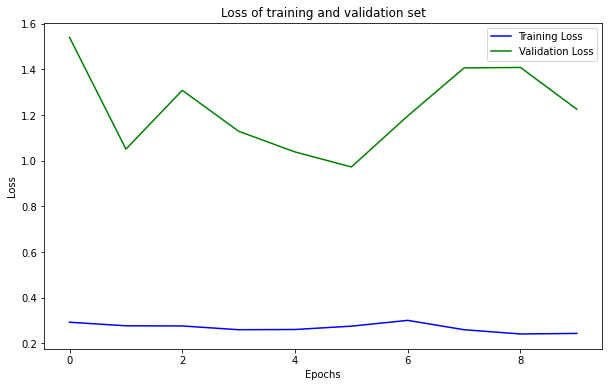

In [85]:
#Visualize the training and validation Loss
plt.figure(figsize = (10,6))
plt.plot(history.history['loss'], color = 'blue', label = 'Training Loss')
plt.plot(history.history['val_loss'], color = 'green', label = 'Validation Loss')
plt.legend()
plt.title('Loss of training and validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

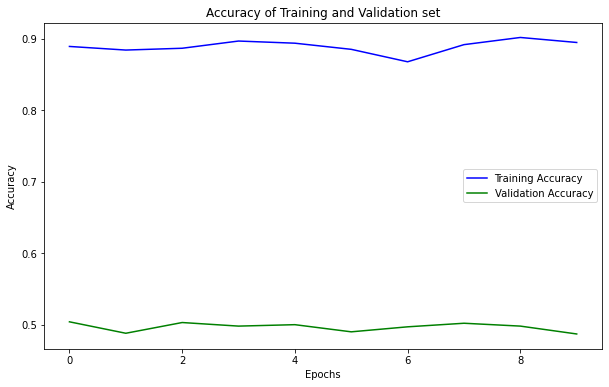

In [86]:
#Visualize the training and validation Accuracy
plt.figure(figsize = (10,6))
plt.plot(history.history['acc'], color = 'blue', label = 'Training Accuracy')
plt.plot(history.history['val_acc'], color = 'green', label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy of Training and Validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [87]:
#Evaluate model
model4.evaluate(test_gtr)

13/13 [==============================] - 1s 79ms/step - loss: 0.2801 - acc: 0.8808


[0.2800857424736023, 0.8807692527770996]

# EfficientNetB0

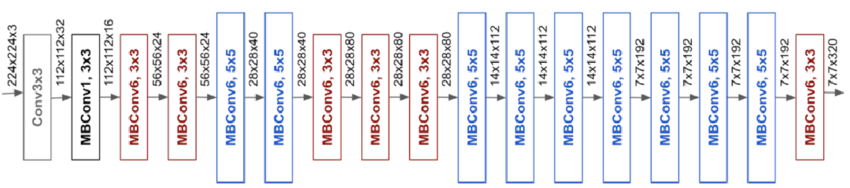

In [88]:
from tensorflow.keras.applications import EfficientNetB0

In [89]:
base_model5 = EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model5.trainable = False #freeze the layers
base_model5.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_5[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (Zero

In [90]:
import tensorflow as tf
model5 = tf.keras.Sequential([
    base_model5,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model5.summary()

model5.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_6 (Flatten)         (None, 62720)             0         
                                                                 
 dense_8 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 4,175,013
Trainable params: 125,442
Non-trainable params: 4,049,571
_________________________________________________________________


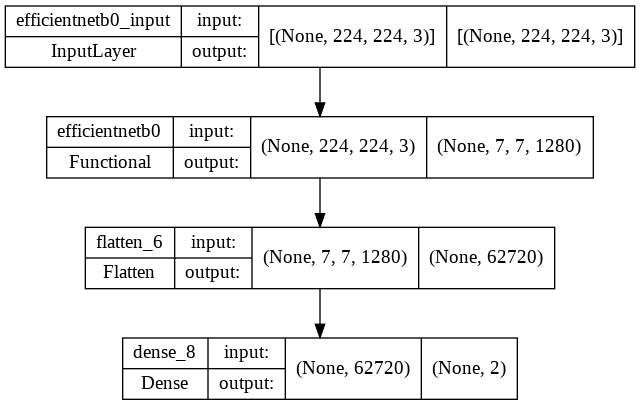

In [91]:
from tensorflow.keras.utils import plot_model
plot_model(model5,  show_shapes=True, show_layer_names=True)

## cats and dogs

In [93]:
history = model5.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 10s 98ms/step - loss: 0.7208 - acc: 0.5535 - val_loss: 0.7852 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 10s 97ms/step - loss: 0.7087 - acc: 0.5487 - val_loss: 0.8023 - val_acc: 0.5000
Epoch 3/10
100/100 [==============================] - 10s 104ms/step - loss: 0.7586 - acc: 0.5250 - val_loss: 0.7699 - val_acc: 0.5000
Epoch 4/10
100/100 [==============================] - 10s 99ms/step - loss: 0.7502 - acc: 0.5300 - val_loss: 0.9402 - val_acc: 0.5000
Epoch 5/10
100/100 [==============================] - 10s 99ms/step - loss: 0.7248 - acc: 0.5568 - val_loss: 0.6895 - val_acc: 0.5370
Epoch 6/10
100/100 [==============================] - 10s 98ms/step - loss: 0.6908 - acc: 0.5685 - val_loss: 0.7154 - val_acc: 0.5000
Epoch 7/10
100/100 [==============================] - 10s 99ms/step - loss: 0.6970 - acc: 0.5650 - val_loss: 0.7314 - val_acc: 0.5000
Epoch 8/10
100/100 [==============================] - 10s 98m

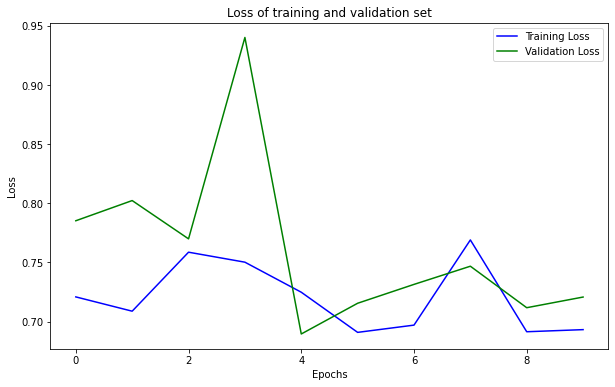

In [94]:
#Visualize the training and validation Loss
plt.figure(figsize = (10,6))
plt.plot(history.history['loss'], color = 'blue', label = 'Training Loss')
plt.plot(history.history['val_loss'], color = 'green', label = 'Validation Loss')
plt.legend()
plt.title('Loss of training and validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

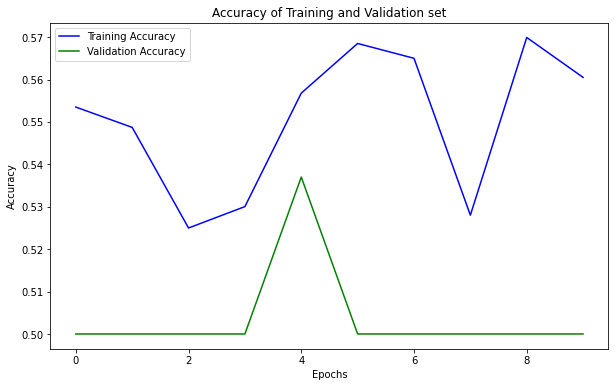

In [95]:
#Visualize the training and validation Accuracy
plt.figure(figsize = (10,6))
plt.plot(history.history['acc'], color = 'blue', label = 'Training Accuracy')
plt.plot(history.history['val_acc'], color = 'green', label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy of Training and Validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [96]:
#Evaluate model
model5.evaluate(validation_generator)

50/50 [==============================] - 4s 75ms/step - loss: 0.7207 - acc: 0.5000


[0.720703125, 0.5]

## horse and zebra

In [97]:
history = model5.fit(
train_gtr,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 10s 103ms/step - loss: 0.6948 - acc: 0.5755 - val_loss: 0.7559 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 10s 96ms/step - loss: 0.7216 - acc: 0.5558 - val_loss: 1.1780 - val_acc: 0.5000
Epoch 3/10
100/100 [==============================] - 10s 96ms/step - loss: 0.6908 - acc: 0.5861 - val_loss: 0.7401 - val_acc: 0.5000
Epoch 4/10
100/100 [==============================] - 10s 96ms/step - loss: 0.6733 - acc: 0.5925 - val_loss: 0.6904 - val_acc: 0.5040
Epoch 5/10
100/100 [==============================] - 10s 96ms/step - loss: 0.7000 - acc: 0.5593 - val_loss: 0.7226 - val_acc: 0.5000
Epoch 6/10
100/100 [==============================] - 10s 97ms/step - loss: 0.6866 - acc: 0.5669 - val_loss: 0.7106 - val_acc: 0.5000
Epoch 7/10
100/100 [==============================] - 10s 96ms/step - loss: 0.6774 - acc: 0.5921 - val_loss: 0.8008 - val_acc: 0.5000
Epoch 8/10
100/100 [==============================] - 10s 96m

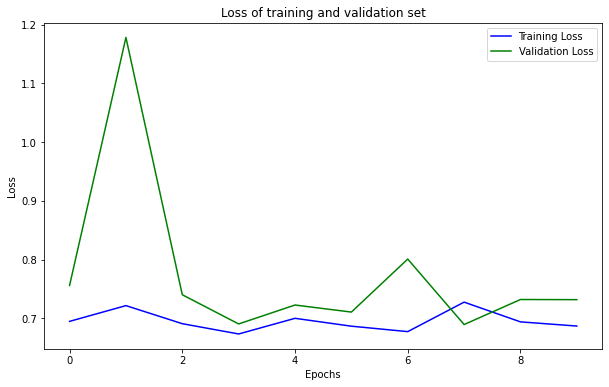

In [98]:
#Visualize the training and validation Loss
plt.figure(figsize = (10,6))
plt.plot(history.history['loss'], color = 'blue', label = 'Training Loss')
plt.plot(history.history['val_loss'], color = 'green', label = 'Validation Loss')
plt.legend()
plt.title('Loss of training and validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

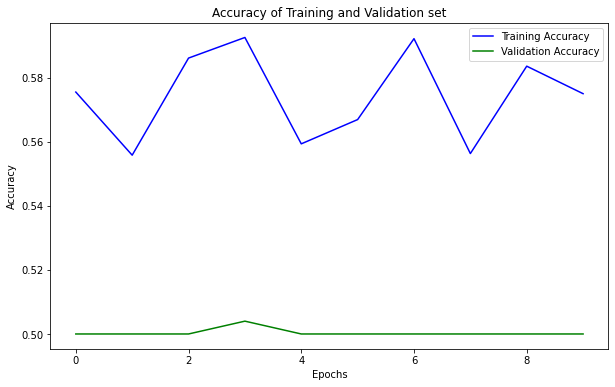

In [99]:
#Visualize the training and validation Accuracy
plt.figure(figsize = (10,6))
plt.plot(history.history['acc'], color = 'blue', label = 'Training Accuracy')
plt.plot(history.history['val_acc'], color = 'green', label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy of Training and Validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [100]:
#Evaluate model
model5.evaluate(test_gtr)

13/13 [==============================] - 1s 61ms/step - loss: 0.6760 - acc: 0.5269


[0.6760349273681641, 0.5269230604171753]

# MobileNetV2

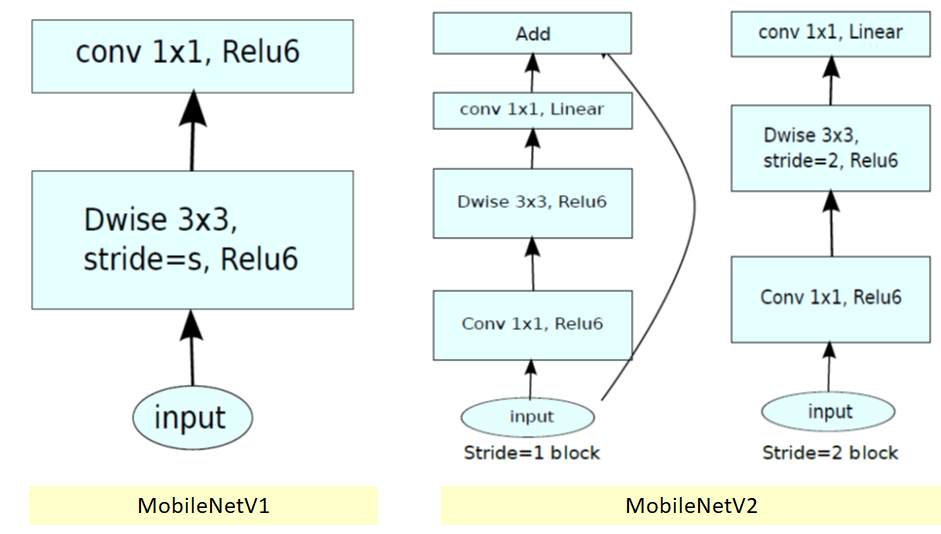

In [101]:
from tensorflow.keras.applications import MobileNetV2

In [102]:
base_model6 = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model6.trainable = False #freeze the layers
base_model6.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [103]:
import tensorflow as tf
model6 = tf.keras.Sequential([
    base_model6,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model6.summary()

model6.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_7 (Flatten)         (None, 62720)             0         
                                                                 
 dense_9 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


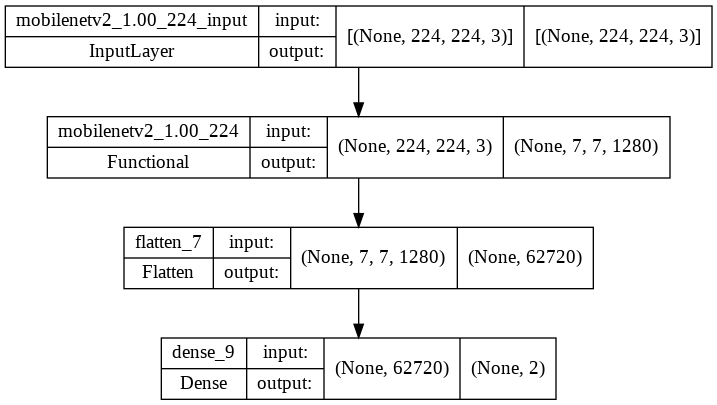

In [104]:
from tensorflow.keras.utils import plot_model
plot_model(model6,  show_shapes=True, show_layer_names=True)

## cats and dogs

In [106]:
history = model6.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 12s 100ms/step - loss: 0.1158 - acc: 0.9601 - val_loss: 3.3351 - val_acc: 0.1790
Epoch 2/10
100/100 [==============================] - 9s 91ms/step - loss: 0.0078 - acc: 0.9970 - val_loss: 3.6310 - val_acc: 0.1960
Epoch 3/10
100/100 [==============================] - 9s 92ms/step - loss: 0.0044 - acc: 0.9990 - val_loss: 3.6506 - val_acc: 0.1920
Epoch 4/10
100/100 [==============================] - 9s 93ms/step - loss: 4.6743e-04 - acc: 1.0000 - val_loss: 3.6540 - val_acc: 0.1920
Epoch 5/10
100/100 [==============================] - 10s 102ms/step - loss: 4.4121e-04 - acc: 1.0000 - val_loss: 3.7103 - val_acc: 0.1760
Epoch 6/10
100/100 [==============================] - 9s 94ms/step - loss: 2.5836e-04 - acc: 1.0000 - val_loss: 3.7381 - val_acc: 0.1790
Epoch 7/10
100/100 [==============================] - 10s 102ms/step - loss: 2.1224e-04 - acc: 1.0000 - val_loss: 3.7389 - val_acc: 0.1770
Epoch 8/10
100/100 [===========================

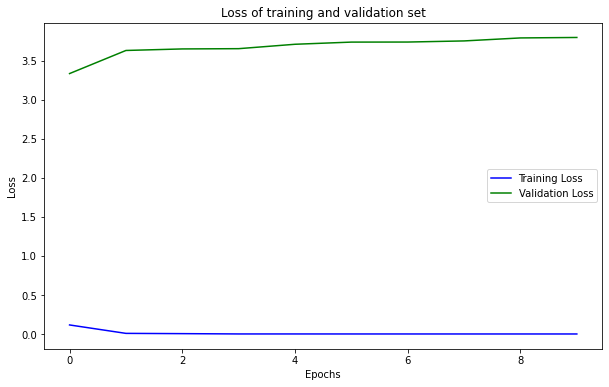

In [107]:
#Visualize the training and validation Loss
plt.figure(figsize = (10,6))
plt.plot(history.history['loss'], color = 'blue', label = 'Training Loss')
plt.plot(history.history['val_loss'], color = 'green', label = 'Validation Loss')
plt.legend()
plt.title('Loss of training and validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

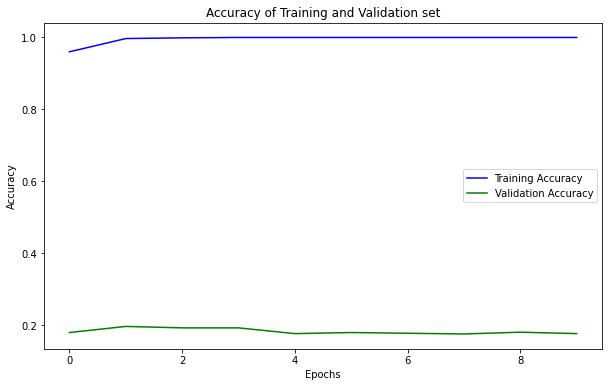

In [108]:
#Visualize the training and validation Accuracy
plt.figure(figsize = (10,6))
plt.plot(history.history['acc'], color = 'blue', label = 'Training Accuracy')
plt.plot(history.history['val_acc'], color = 'green', label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy of Training and Validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [109]:
#Evaluate model
model6.evaluate(validation_generator)

50/50 [==============================] - 4s 76ms/step - loss: 3.7975 - acc: 0.1760


[3.7974801063537598, 0.17599999904632568]

## horse and zebra

In [110]:
history = model6.fit(
train_gtr,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 11s 109ms/step - loss: 1.2268e-04 - acc: 1.0000 - val_loss: 3.8208 - val_acc: 0.1780
Epoch 2/10
100/100 [==============================] - 9s 92ms/step - loss: 1.1202e-04 - acc: 1.0000 - val_loss: 3.8334 - val_acc: 0.1790
Epoch 3/10
100/100 [==============================] - 9s 91ms/step - loss: 1.0906e-04 - acc: 1.0000 - val_loss: 3.8512 - val_acc: 0.1790
Epoch 4/10
100/100 [==============================] - 9s 92ms/step - loss: 9.5488e-05 - acc: 1.0000 - val_loss: 3.8597 - val_acc: 0.1780
Epoch 5/10
100/100 [==============================] - 9s 91ms/step - loss: 8.3701e-05 - acc: 1.0000 - val_loss: 3.8692 - val_acc: 0.1780
Epoch 6/10
100/100 [==============================] - 11s 114ms/step - loss: 8.1818e-05 - acc: 1.0000 - val_loss: 3.8842 - val_acc: 0.1820
Epoch 7/10
100/100 [==============================] - 9s 92ms/step - loss: 7.4078e-05 - acc: 1.0000 - val_loss: 3.8924 - val_acc: 0.1830
Epoch 8/10
100/100 [=================

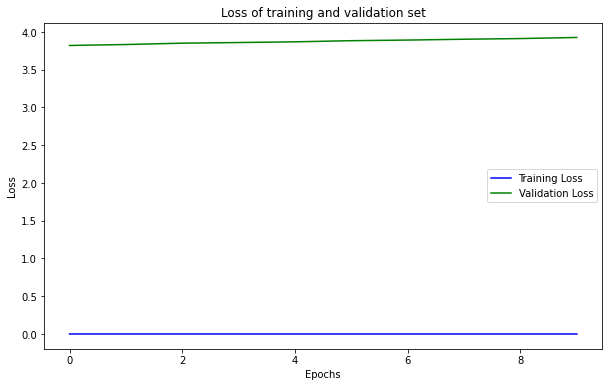

In [111]:
#Visualize the training and validation Loss
plt.figure(figsize = (10,6))
plt.plot(history.history['loss'], color = 'blue', label = 'Training Loss')
plt.plot(history.history['val_loss'], color = 'green', label = 'Validation Loss')
plt.legend()
plt.title('Loss of training and validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

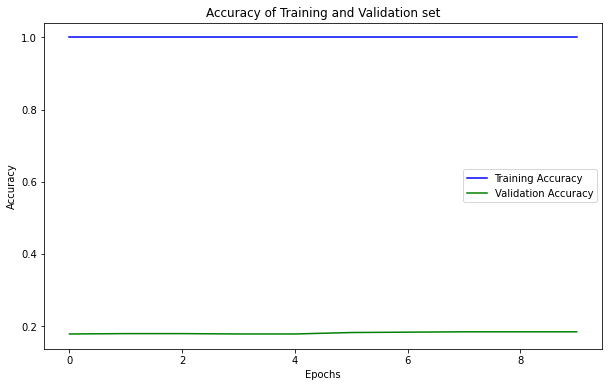

In [112]:
#Visualize the training and validation Accuracy
plt.figure(figsize = (10,6))
plt.plot(history.history['acc'], color = 'blue', label = 'Training Accuracy')
plt.plot(history.history['val_acc'], color = 'green', label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy of Training and Validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [113]:
#Evaluate model
model6.evaluate(test_gtr)

13/13 [==============================] - 1s 61ms/step - loss: 0.1161 - acc: 0.9885


[0.11605361104011536, 0.9884615540504456]

### Inference:

VGG_16 gives the highest accuracy (cats and dog dataset): 90.3

MobileNetV2 gives the highest accuracy (horse zebra dataset): 98.84



---

